In [1]:
import lightgbm as lgb
from ticket_upgrade_prediction.pipeline import Pipeline

In [2]:
d = Pipeline(model_type="predict_upgrade")
dataset = d.scale_final_dataset()

2022-10-09 17:51:22.161 | INFO     | ticket_upgrade_prediction.pipeline:read_all_files:43 - loaded booking data
2022-10-09 17:51:26.670 | INFO     | ticket_upgrade_prediction.pipeline:read_all_files:45 - loaded ticket data
2022-10-09 17:51:45.243 | INFO     | ticket_upgrade_prediction.pipeline:read_all_files:47 - loaded flight coupon data
2022-10-09 17:51:45.244 | INFO     | ticket_upgrade_prediction.pipeline:merge_files:62 - 2022-10-09 17:51:45.244947 merging datasets
2022-10-09 17:52:59.040 | INFO     | ticket_upgrade_prediction.pipeline:clean_df:293 - 2022-10-09 17:52:59.040109 cleaning df ...
2022-10-09 17:53:34.790 | INFO     | ticket_upgrade_prediction.pipeline:convert_datetime_columns_to_pandas_format:161 - converted datetime columns to pandas format
2022-10-09 17:53:39.459 | INFO     | ticket_upgrade_prediction.pipeline:filter_wrong_ticket_prices:144 - filtered wrong ticket prices
2022-10-09 17:53:42.475 | INFO     | ticket_upgrade_prediction.pipeline:filter_wrong_booking_windo

In [3]:
model = lgb.LGBMClassifier()
model.fit(dataset.X_train, dataset.y_train)
print(model)
expected_y  = dataset.y_test
predicted_y = model.predict(dataset.X_test)

LGBMClassifier()


Best Threshold=0.000615


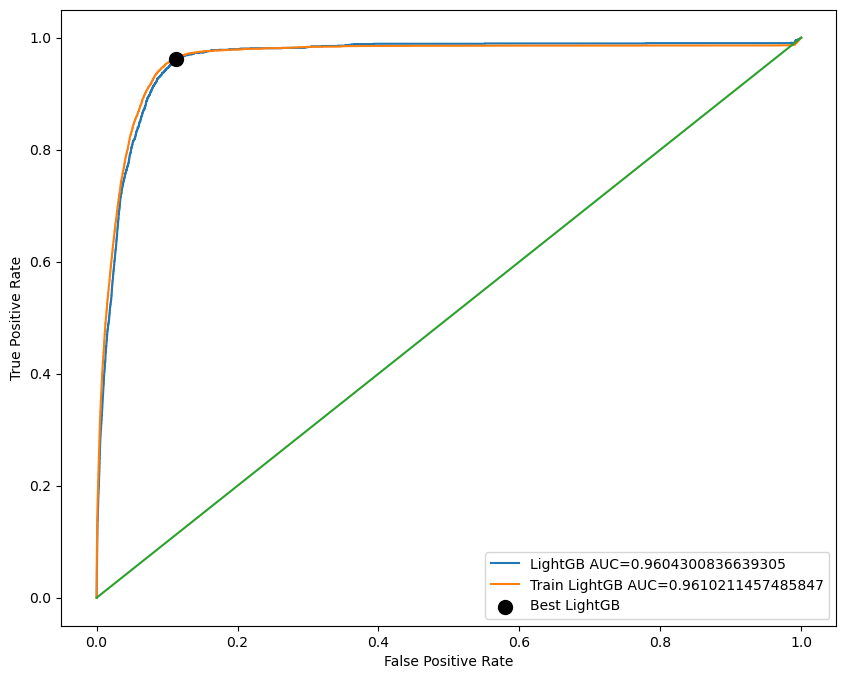

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
from numpy import argmax
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(dataset.X_test)[::,1]
fpr, tpr, thresholds = roc_curve(expected_y,  y_pred_proba)
auc = roc_auc_score(expected_y, y_pred_proba)
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

y_pred_proba2 = model.predict_proba(dataset.X_train)[::,1]
fpr2, tpr2, thresholds2 = roc_curve(dataset.y_train,  y_pred_proba2)
auc2 = roc_auc_score(dataset.y_train, y_pred_proba2)

# ROC
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label="LightGB AUC="+str(auc))
plt.plot(fpr2, tpr2, label="Train LightGB AUC="+str(auc2))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best LightGB', s=100, zorder=3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot((0, 1), (0, 1))
plt.show()